In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#Build the path to the dataset
macdonalds_path = os.path.join('dataset', 'McDonald_s_Reviews.csv')

# Read the CSV file with a specified encoding
macdonalds_df = pd.read_csv(macdonalds_path, encoding='latin1')

# Display the first few rows of the dataframe
macdonalds_df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [3]:
# Display the column names of the dataframe
macdonalds_df.columns


Index(['reviewer_id', 'store_name', 'category', 'store_address', 'latitude ',
       'longitude', 'rating_count', 'review_time', 'review', 'rating'],
      dtype='object')

In [4]:
macdonalds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


In [5]:
# Let's see store_name and category columns
print(macdonalds_df['store_name'].value_counts())
print('\n')
print(macdonalds_df['category'].value_counts())

store_name
McDonald's       33325
ýýýMcDonald's       71
Name: count, dtype: int64


category
Fast food restaurant    33396
Name: count, dtype: int64


In [6]:
# Drop the columns that are not needed
key_columns = ['review', 'rating']

macdonalds_df = macdonalds_df[key_columns]

macdonalds_df.head()

,review,rating
0,Why does it look like someone spit on my food?...,1 star
1,It'd McDonalds. It is what it is as far as the...,4 stars
2,Made a mobile order got to the speaker and che...,1 star
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,"I repeat my order 3 times in the drive thru, a...",1 star


In [7]:
# Remove from rating column the string 'star' or 'stars' and convert it to integer
macdonalds_df['rating'] = macdonalds_df['rating'].str.replace('star', '').str.replace('s', '').astype(int)

# Display the first few rows of the dataframe
macdonalds_df.head()

,review,rating
0,Why does it look like someone spit on my food?...,1
1,It'd McDonalds. It is what it is as far as the...,4
2,Made a mobile order got to the speaker and che...,1
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5
4,"I repeat my order 3 times in the drive thru, a...",1


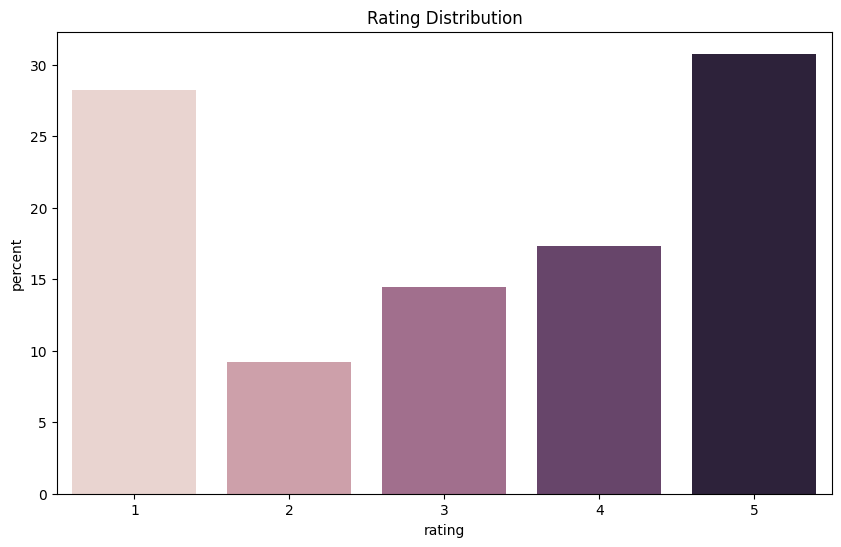

In [8]:
# Diplsay the information the distribution of the ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=macdonalds_df, hue='rating', legend=False, stat='percent')
plt.title('Rating Distribution')
plt.show()


In [9]:
# Analyze the text data

pd.set_option('display.max_colwidth', None)

# show the first few rows of the review column
macdonalds_df[['review']].head()

,review
0,"Why does it look like someone spit on my food?\nI had a normal transaction, everyone was chill and polite, but now i dont want to eat this. Im trying not to think about what this milky white/clear substance is all over my food, i d*** sure am not coming back."
1,"It'd McDonalds. It is what it is as far as the food and atmosphere go. The staff here does make a difference. They are all friendly, accommodating and always smiling. Makes for a more pleasant experience than many other fast food places."
2,Made a mobile order got to the speaker and checked it in.\nLine was not moving so I had to leave otherwise Iï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½d be late for work.\nNever got the refund in the app.\nI called them and they said I could only get my money back in person because it was stuck in the system.\nWent there in person the next day and the manager told me she wasnï¿
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ customer service was quick and p
4,"I repeat my order 3 times in the drive thru, and she still manage to mess it up , it was suppose to be a large meal double filet of fish with large fries , no cheese . It was all wrong , they either need to pay close attention to the order being made , understand English or they need not to work at a drive thru"


In [10]:
# Convert the text to lowercase
macdonalds_df['review'] = macdonalds_df['review'].str.lower()

In [11]:
# Common abbreviations
abbreviations = {
    "u": "you",
    "ur": "your",
    "r": "are",
    "b4": "before",
    "gr8": "great",
    "l8r": "later",
    "thx": "thanks",
    "pls": "please",
    "omg": "oh my god",
    "idk": "i don't know",
    "lol": "laughing out loud",
    "brb": "be right back",
    "btw": "by the way",
    "ttyl": "talk to you later",
    "afaik": "as far as i know",
    "imo": "in my opinion",
    "imho": "in my humble opinion",
    "tbh": "to be honest",
    "np": "no problem",
    "nvm": "never mind",
    "msg": "message",
    "dm": "direct message",
    "bc": "because",
    "bff": "best friends forever",
    "jk": "just kidding",
    "bday": "birthday",
    "cya": "see you",
    "fyi": "for your information",
    "asap": "as soon as possible",
    "tba": "to be announced",
    "tbd": "to be decided",
    "omw": "on my way",
    "irl": "in real life",
    "thx": "thanks",
    "w/e": "whatever",
    "w/o": "without",
    "atm": "at the moment",
    "fomo": "fear of missing out",
    "smh": "shaking my head",
    "rofl": "rolling on the floor laughing",
    "wfh": "work from home",
    "imo": "in my opinion",
    "ftw": "for the win",
    "rn": "right now",
    "yt": "youtube",
    "fb": "facebook",
    "ig": "instagram",
    "snap": "snapchat",
    "tmi": "too much information",
    "pov": "point of view",
    "hmu": "hit me up",
    "ama": "ask me anything",
    "imo": "in my opinion",
    "imho": "in my humble opinion",
    "smh": "shaking my head",
    "wth": "what the hell",
    "wtf": "what the fuck",
    "yolo": "you only live once",
    "bae": "before anyone else",
    "lmao": "laughing my ass off",
    "tbh": "to be honest",
    "gr8": "great",
    "cuz": "because",
    "ppl": "people",
    "b4n": "bye for now",
    "gtg": "got to go",
    "xoxo": "hugs and kisses",
    "icymi": "in case you missed it",
    "rsvp": "répondez s'il vous plaît"
}


In [12]:
abbreviations.update({
    "btw": "by the way",
    "ttys": "talk to you soon",
    "lmk": "let me know",
    "wyd": "what are you doing",
    "wya": "where are you at",
    "imo": "in my opinion",
    "imh": "in my humble opinion",
    "idc": "i don't care",
    "irl": "in real life",
    "tbf": "to be fair",
    "wbu": "what about you",
    "g2g": "got to go",
    "omg": "oh my god",
    "diy": "do it yourself",
    "gg": "good game",
    "gn": "good night",
    "gm": "good morning",
    "ftl": "for the loss",
    "m8": "mate",
    "imo": "in my opinion",
    "nm": "not much",
    "nvm": "never mind",
    "pm": "private message",
    "jk": "just kidding",
    "nsfw": "not safe for work",
    "tldr": "too long didn't read",
    "bruh": "brother",
    "fam": "family",
    "idgaf": "i don't give a f***",
    "roflmao": "rolling on the floor laughing my ass off",
    "fyi": "for your information",
    "q&a": "questions and answers",
    "fwiw": "for what it's worth",
    "l8": "late",
    "msg": "message",
    "b/c": "because",
    "bbl": "be back later",
    "jfc": "jesus f***ing christ",
    "wtf": "what the f***",
    "smh": "shaking my head",
    "bbl": "be back later",
    "y'all": "you all",
    "tbh": "to be honest",
    "wyd": "what are you doing",
    "omg": "oh my god",
    "plz": "please",
    "stfu": "shut the f*** up",
    "ppl": "people",
    "b4": "before",
    "xoxo": "hugs and kisses"
})


In [13]:
import re

In [14]:
# Replace all abbreviations with the correct word
def replace_abbreviations(text, abbreviations):
    for abbr, full_form in abbreviations.items():
        text = re.sub(r'\b' + re.escape(abbr) + r'\b', full_form, text)
    return text

macdonalds_df['review'] = macdonalds_df['review'].apply(lambda text: replace_abbreviations(text, abbreviations))

macdonalds_df.head()

,review,rating
0,"why does it look like someone spit on my food?\ni had a normal transaction, everyone was chill and polite, but now i dont want to eat this. im trying not to think about what this milky white/clear substance is all over my food, i d*** sure am not coming back.",1
1,"it'd mcdonalds. it is what it is as far as the food and atmosphere go. the staff here does make a difference. they are all friendly, accommodating and always smiling. makes for a more pleasant experience than many other fast food places.",4
2,made a mobile order got to the speaker and checked it in.\nline was not moving so i had to leave otherwise iï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½d be late for work.\nnever got the refund in the app.\ni called them and they said i could only get my money back in person because it was stuck in the system.\nwent there in person the next day and the manager told me she wasnï¿,1
3,my mc. crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ customer service was quick and p,5
4,"i repeat my order 3 times in the drive thru, and she still manage to mess it up , it was suppose to be a large meal double filet of fish with large fries , no cheese . it was all wrong , they either need to pay close attention to the order being made , understand english or they need not to work at a drive thru",1


In [15]:
# Import nltk library
import nltk

In [16]:
# Define a function to remove extra spaces. It uses the split() function to divide a string into words by deleting
# spaces. Then, re-join the string together separating words with single spaces.

def remove_whitespace(text):
    return  " ".join(text.split())

# Apply the function to the review column
macdonalds_df['review'] = macdonalds_df['review'].apply(lambda text: remove_whitespace(text))

macdonalds_df.head()

,review,rating
0,"why does it look like someone spit on my food? i had a normal transaction, everyone was chill and polite, but now i dont want to eat this. im trying not to think about what this milky white/clear substance is all over my food, i d*** sure am not coming back.",1
1,"it'd mcdonalds. it is what it is as far as the food and atmosphere go. the staff here does make a difference. they are all friendly, accommodating and always smiling. makes for a more pleasant experience than many other fast food places.",4
2,made a mobile order got to the speaker and checked it in. line was not moving so i had to leave otherwise iï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½d be late for work. never got the refund in the app. i called them and they said i could only get my money back in person because it was stuck in the system. went there in person the next day and the manager told me she wasnï¿,1
3,my mc. crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ customer service was quick and p,5
4,"i repeat my order 3 times in the drive thru, and she still manage to mess it up , it was suppose to be a large meal double filet of fish with large fries , no cheese . it was all wrong , they either need to pay close attention to the order being made , understand english or they need not to work at a drive thru",1


In [17]:
# Remove special characters and puctuation
def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Apply the function to the review column
macdonalds_df['review'] = macdonalds_df['review'].apply(lambda text: remove_special_characters(text))

macdonalds_df.head()

,review,rating
0,why does it look like someone spit on my food i had a normal transaction everyone was chill and polite but now i dont want to eat this im trying not to think about what this milky whiteclear substance is all over my food i d sure am not coming back,1
1,itd mcdonalds it is what it is as far as the food and atmosphere go the staff here does make a difference they are all friendly accommodating and always smiling makes for a more pleasant experience than many other fast food places,4
2,made a mobile order got to the speaker and checked it in line was not moving so i had to leave otherwise id be late for work never got the refund in the app i called them and they said i could only get my money back in person because it was stuck in the system went there in person the next day and the manager told me she wasn,1
3,my mc crispy chicken sandwich was customer service was quick and p,5
4,i repeat my order times in the drive thru and she still manage to mess it up it was suppose to be a large meal double filet of fish with large fries no cheese it was all wrong they either need to pay close attention to the order being made understand english or they need not to work at a drive thru,1


In [18]:
# Tokenization
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gemel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
# Tokenization of the whole text
# the output is a list, where each element is a token of the original text

macdonalds_df['tokenized_review'] = macdonalds_df['review'].apply(lambda text: nltk.word_tokenize(text))
print('-' * 1000)
print('Review:\n')
print(macdonalds_df['review'][0])
print('-' * 1000)
print('Tokenized Review:\n')
print(macdonalds_df['tokenized_review'][0])

In [ ]:
# Stopword removal
# import the list of the english stopwords and save it into stopwords_en
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')

In [ ]:
# Define a function to remove stopwords
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stopwords_en]

# Apply the function to the tokenized_review column
macdonalds_df['tokenized_review_stopword_removal'] = macdonalds_df['tokenized_review'].apply(lambda tokens: remove_stopwords(tokens))

print('-' * 1000)
print('Tokenized Review:\n')
print(macdonalds_df['tokenized_review'][0])
print('-' * 1000)
print('Tokenized Review after Stopword Removal:\n')
print(macdonalds_df['tokenized_review_stopword_removal'][0])


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# POS Tagging
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gemel\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# POS Tagging of the whole text
# the output is a list, where each element is a tuple of the token and its POS tag

macdonalds_df['pos_tags'] = macdonalds_df['tokenized_review_stopword_removal'].apply(lambda tokens: nltk.pos_tag(tokens))

print('-' * 1000)
print('Tokenized Review after Stopword Removal:\n')
print(macdonalds_df['tokenized_review_stopword_removal'][0])
print('-' * 1000)
print('POS Tags:\n')
print(macdonalds_df['pos_tags'][0])


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Lemmatization
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gemel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def simpler_pos_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return "a"
    elif nltk_tag.startswith('V'):
        return "v"
    elif nltk_tag.startswith('N'):
        return "n"
    elif nltk_tag.startswith('R'):
        return "r"
    else:         
        return None
    
    
# Apply the function to the pos_tags column
macdonalds_df['pos_tags_simplified'] = macdonalds_df['pos_tags'].apply(lambda pos_tags: [(word, simpler_pos_tag(tag)) for word, tag in pos_tags])

print('-' * 1000)
print('POS Tags:\n')
print(macdonalds_df['pos_tags'][0])
print('-' * 1000)
print('Simplified POS Tags:\n')
print(macdonalds_df['pos_tags_simplified'][0])



----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Define a function to lemmatize the tokens
def lemmatize(tokens):
    lemmatized_text = []
    for tuple in tokens:
        if (tuple[1] == None):
            lemmatized_text.append(lemmatizer.lemmatize(tuple[0]))
        else:
            lemmatized_text.append(lemmatizer.lemmatize(tuple[0], pos=tuple[1]))
    
    return lemmatized_text


# Apply the function to the pos_tags column
macdonalds_df['lemmatized_tokens'] = macdonalds_df['pos_tags_simplified'].apply(lambda tokens: lemmatize(tokens))

print('-' * 1000)
print('POS Tags:\n')
print(macdonalds_df['pos_tags_simplified'][0])
print('-' * 1000)
print('Lemmatized Tokens:\n')
print(macdonalds_df['lemmatized_tokens'][0])


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Define a function to join the tokens back to a single string
def join_tokens(tokens):
    return ' '.join(tokens)

# Apply the function to the lemmatized
macdonalds_df['cleaned_review'] = macdonalds_df['lemmatized_tokens'].apply(lambda tokens: join_tokens(tokens))

macdonalds_df.head()

,review,rating,tokenized_review,tokenized_review_stopword_removal,pos_tags,pos_tags_simplified,lemmatized_tokens,cleaned_review
0,why does it look like someone spit on my food i had a normal transaction everyone was chill and polite but now i dont want to eat this im trying not to think about what this milky whiteclear substance is all over my food i d sure am not coming back,1,"[why, does, it, look, like, someone, spit, on, my, food, i, had, a, normal, transaction, everyone, was, chill, and, polite, but, now, i, dont, want, to, eat, this, im, trying, not, to, think, about, what, this, milky, whiteclear, substance, is, all, over, my, food, i, d, sure, am, not, coming, back]","[look, like, someone, spit, food, normal, transaction, everyone, chill, polite, dont, want, eat, im, trying, think, milky, whiteclear, substance, food, sure, coming, back]","[(look, NN), (like, IN), (someone, NN), (spit, VBD), (food, NN), (normal, JJ), (transaction, NN), (everyone, NN), (chill, NN), (polite, VBP), (dont, NN), (want, VBP), (eat, NN), (im, NN), (trying, VBG), (think, VBP), (milky, JJ), (whiteclear, JJ), (substance, NN), (food, NN), (sure, NN), (coming, VBG), (back, RB)]","[(look, n), (like, None), (someone, n), (spit, v), (food, n), (normal, a), (transaction, n), (everyone, n), (chill, n), (polite, v), (dont, n), (want, v), (eat, n), (im, n), (trying, v), (think, v), (milky, a), (whiteclear, a), (substance, n), (food, n), (sure, n), (coming, v), (back, r)]","[look, like, someone, spit, food, normal, transaction, everyone, chill, polite, dont, want, eat, im, try, think, milky, whiteclear, substance, food, sure, come, back]",look like someone spit food normal transaction everyone chill polite dont want eat im try think milky whiteclear substance food sure come back
1,itd mcdonalds it is what it is as far as the food and atmosphere go the staff here does make a difference they are all friendly accommodating and always smiling makes for a more pleasant experience than many other fast food places,4,"[itd, mcdonalds, it, is, what, it, is, as, far, as, the, food, and, atmosphere, go, the, staff, here, does, make, a, difference, they, are, all, friendly, accommodating, and, always, smiling, makes, for, a, more, pleasant, experience, than, many, other, fast, food, places]","[itd, mcdonalds, far, food, atmosphere, go, staff, make, difference, friendly, accommodating, always, smiling, makes, pleasant, experience, many, fast, food, places]","[(itd, NN), (mcdonalds, NNS), (far, RB), (food, NN), (atmosphere, RB), (go, VBP), (staff, NN), (make, VBP), (difference, NN), (friendly, JJ), (accommodating, VBG), (always, RB), (smiling, VBG), (makes, VBZ), (pleasant, JJ), (experience, NN), (many, JJ), (fast, RB), (food, NN), (places, NNS)]","[(itd, n), (mcdonalds, n), (far, r), (food, n), (atmosphere, r), (go, v), (staff, n), (make, v), (difference, n), (friendly, a), (accommodating, v), (always, r), (smiling, v), (makes, v), (pleasant, a), (experience, n), (many, a), (fast, r), (food, n), (places, n)]","[itd, mcdonalds, far, food, atmosphere, go, staff, make, difference, friendly, accommodate, always, smile, make, pleasant, experience, many, fast, food, place]",itd mcdonalds far food atmosphere go staff make difference friendly accommodate always smile make pleasant experience many fast food place
2,made a mobile order got to the speaker and checked it in line was not moving so i had to leave otherwise id be late for work never got the refund in the app i called them and they said i could only get my money back in person because it was stuck in the system went there in person the next day and the manager told me she wasn,1,"[made, a, mobile, order, got, to, the, speaker, and, checked, it, in, line, was, not, moving, so, i, had, to, leave, otherwise, id, be, late, for, work, never, got, the, refund, in, the, app, i, called, them, and, they, said, i, could, only, get, my, money, back, in, person, because, it, was, stuck, in, the, system, went, there, in, person, t

In [ ]:
# Plot the word cloud
from wordcloud import WordCloud

Text(0.5, 1.0, 'Most Common Words in Reviews')

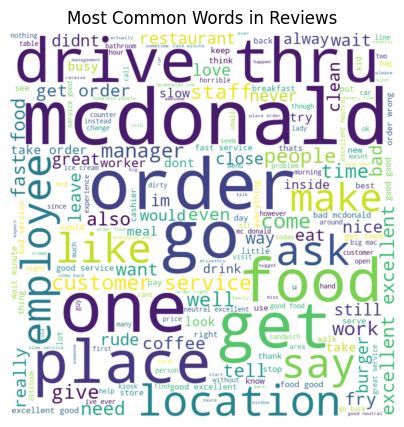

In [ ]:
# Create a word cloud object
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords_en, 
                min_font_size = 10).generate(' '.join(macdonalds_df['cleaned_review']))

# Plot the word cloud
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')

In [ ]:
# Obtain the TF-IDF matrix
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the vectorizer on the cleaned_review column
tfidf_matrix = vectorizer.fit_transform(macdonalds_df['cleaned_review'])

In [ ]:
# Create a DataFrame for the TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df.head()

,aa,aaa,aaaah,aaand,aak,aarp,aau,ab,abandon,abc,...,yyyyy,zacharine,zari,zero,zombie,zone,zoo,zooand,zoolocation,zooorder
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tfidf_sums = tfidf_df.sum(axis=0)

#Sort the words by their TF-IDF score
tfidf_sums.sort_values(ascending=False, inplace=True)

# Plot TF-IDF scores
plt.figure(figsize=(10, 6))
sns.barplot(x=tfidf_sums.head(20).values, y=tfidf_sums.head(20).index)
plt.title('TF-IDF Scores')
plt.show()
